In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

diab = pd.read_csv('Data\diabetes_data.csv', sep=',')
diab

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Gender
0,6,98,58,33,190,34.0,0.430,43,0,Female
1,2,112,75,32,0,35.7,0.148,21,0,Female
2,2,108,64,0,0,30.8,0.158,21,0,Female
3,8,107,80,0,0,24.6,0.856,34,0,Female
4,7,136,90,0,0,29.9,0.210,50,0,Female
...,...,...,...,...,...,...,...,...,...,...
773,6,103,72,32,190,37.7,0.324,55,0,Female
774,1,71,48,18,76,20.4,0.323,22,0,Female
775,0,117,0,0,0,33.8,0.932,44,0,Female
776,4,154,72,29,126,31.3,0.338,37,0,Female


In [2]:
dups = list(diab.columns)

mask = diab.duplicated(subset=dups)
diab_dups = diab[mask]
dd = diab.drop_duplicates(subset=dups)
print(f'num of dups: {dd.shape[0]}')
dd

num of dups: 768


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Gender
0,6,98,58,33,190,34.0,0.430,43,0,Female
1,2,112,75,32,0,35.7,0.148,21,0,Female
2,2,108,64,0,0,30.8,0.158,21,0,Female
3,8,107,80,0,0,24.6,0.856,34,0,Female
4,7,136,90,0,0,29.9,0.210,50,0,Female
...,...,...,...,...,...,...,...,...,...,...
763,5,139,64,35,140,28.6,0.411,26,0,Female
764,1,96,122,0,0,22.4,0.207,27,0,Female
765,10,101,86,37,0,45.6,1.136,38,1,Female
766,0,141,0,0,0,42.4,0.205,29,1,Female


In [3]:
low_info_col = []

for col in dd.columns:
    top = dd[col].value_counts(normalize=True).max()
    nunique = dd[col].nunique() / dd[col].count()
    if top > 0.95:
        low_info_col.append(col)
        print(f'{col}: {round(top*100, 2)}% одинаковых значений')
    if nunique > 0.95:
        low_info_col.append(col)
        print(f'{col}: {round(nunique*100, 2)}% уникальных значений')

inform_diab = dd.drop(low_info_col, axis=1)
print(f'Результирующее число признаков: {inform_diab.shape[1]}')

inform_diab

Gender: 100.0% одинаковых значений
Результирующее число признаков: 9


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,98,58,33,190,34.0,0.430,43,0
1,2,112,75,32,0,35.7,0.148,21,0
2,2,108,64,0,0,30.8,0.158,21,0
3,8,107,80,0,0,24.6,0.856,34,0
4,7,136,90,0,0,29.9,0.210,50,0
...,...,...,...,...,...,...,...,...,...
763,5,139,64,35,140,28.6,0.411,26,0
764,1,96,122,0,0,22.4,0.207,27,0
765,10,101,86,37,0,45.6,1.136,38,1
766,0,141,0,0,0,42.4,0.205,29,1


In [4]:
def null(x):
    return np.nan if x == 0 else x
inform_diab['Glucose'] = inform_diab['Glucose'].apply(null)
inform_diab['BloodPressure'] = inform_diab['BloodPressure'].apply(null)
inform_diab['SkinThickness'] = inform_diab['SkinThickness'].apply(null)
inform_diab['Insulin'] = inform_diab['Insulin'].apply(null)
inform_diab['BMI'] = inform_diab['BMI'].apply(null)
inform_diab.isnull().mean().round(2).sort_values(ascending=False)

Insulin                     0.49
SkinThickness               0.30
BloodPressure               0.05
Glucose                     0.01
BMI                         0.01
Pregnancies                 0.00
DiabetesPedigreeFunction    0.00
Age                         0.00
Outcome                     0.00
dtype: float64

In [5]:
idc = inform_diab.copy()
thresh = idc.shape[0] * 0.7
idc = idc.dropna(thresh=thresh, axis=1)
idc.isnull().mean()

Pregnancies                 0.000000
Glucose                     0.006510
BloodPressure               0.045573
SkinThickness               0.295573
BMI                         0.014323
DiabetesPedigreeFunction    0.000000
Age                         0.000000
Outcome                     0.000000
dtype: float64

In [6]:
m = inform_diab.copy()
n = m.shape[1]
m = m.dropna(thresh=n-2)
m

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,98.0,58.0,33.0,190.0,34.0,0.430,43,0
1,2,112.0,75.0,32.0,NaN,35.7,0.148,21,0
2,2,108.0,64.0,NaN,NaN,30.8,0.158,21,0
3,8,107.0,80.0,NaN,NaN,24.6,0.856,34,0
4,7,136.0,90.0,NaN,NaN,29.9,0.210,50,0
...,...,...,...,...,...,...,...,...,...
762,2,122.0,76.0,27.0,200.0,35.9,0.483,26,0
763,5,139.0,64.0,35.0,140.0,28.6,0.411,26,0
764,1,96.0,122.0,NaN,NaN,22.4,0.207,27,0
765,10,101.0,86.0,37.0,NaN,45.6,1.136,38,1


In [7]:
null_data = inform_diab.isnull().sum()
cols = null_data[null_data>0].index
for col in cols:
    inform_diab[col] = inform_diab[col].fillna(inform_diab[col].median())
print(inform_diab['SkinThickness'].mean())

29.108072916666668


In [8]:
def outliers_iqr_mod(data, feature, left = 1.5, right = 1.5, log_scale=True):
    x = data[feature]
    if log_scale:
        x = np.log(data[feature])
    else:
        x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    log_scale = True
    left = left * iqr
    right = right * iqr
    lower_bound = quartile_1 - left
    upper_bound = quartile_3 + right
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) | (x <= upper_bound)]
    return outliers, cleaned

outliers, cleaned = outliers_iqr_mod(inform_diab, 'DiabetesPedigreeFunction', log_scale=True)
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')





Число выбросов по методу Тьюки: 0
Результирующее число записей: 768


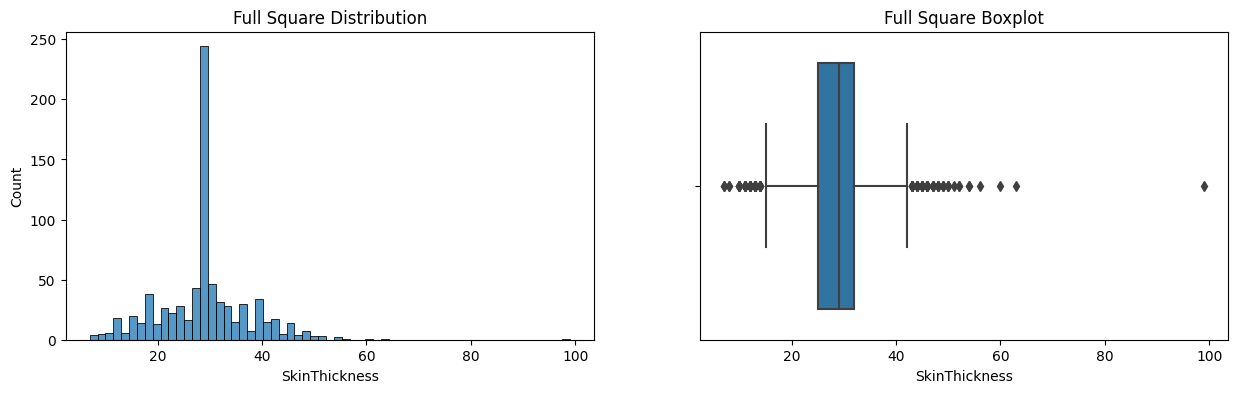

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=cleaned, x='SkinThickness', ax=axes[0]);
histplot.set_title('Full Square Distribution')
boxplot = sns.boxplot(data=cleaned, x='SkinThickness', ax=axes[1]);
boxplot.set_title('Full Square Boxplot');

In [10]:
def outliers_iqr_mod(data, feature, left = 3, right = 3, log_scale=False):
    x = data[feature]
    if log_scale:
        x = np.log(data[feature])
    else:
        x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    log_scale = True
    left = left * iqr
    right = right * iqr
    lower_bound = quartile_1 - left
    upper_bound = quartile_3 + right
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) | (x <= upper_bound)]
    return outliers, cleaned

outliers, cleaned = outliers_iqr_mod(inform_diab, 'DiabetesPedigreeFunction', left=3, right=3, log_scale=True)
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')


Число выбросов по методу Тьюки: 0
Результирующее число записей: 768
